# Importando base de dados

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('tips.csv')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução

In [3]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [4]:
renomear = {
    'total_bill': 'valor_da_conta',
    'tip': 'gorjeta',
    'dessert': 'sobremesa',
    'day': 'dia_da_semana',
    'time': 'hora_do_dia',
    'size': 'total_de_pessoas'
}

In [5]:
gorjetas = dados.rename(columns=renomear)

In [6]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [7]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [8]:
gorjetas.sobremesa.value_counts()

No     151
Yes     93
Name: sobremesa, dtype: int64

In [9]:
sim_nao = {
    'No': 'Não', 
    'Yes': 'Sim'
}

In [10]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [11]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [12]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [13]:
gorjetas.dia_da_semana.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: dia_da_semana, dtype: int64

In [14]:
dias = {
    'Sun': 'Domingo', 
    'Sat': 'Sábado', 
    'Thur': 'Quinta', 
    'Fri': 'Sexta'
}

In [15]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [16]:
gorjetas.sample(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
81,16.66,3.40,Não,Quinta,Lunch,2
53,9.94,1.56,Não,Domingo,Dinner,2
171,15.81,3.16,Sim,Sábado,Dinner,2
178,9.60,4.00,Sim,Domingo,Dinner,2
122,14.26,2.50,Não,Quinta,Lunch,2


In [17]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [18]:
gorjetas.hora_do_dia.value_counts()

Dinner    176
Lunch      68
Name: hora_do_dia, dtype: int64

In [19]:
hora = {
    'Dinner': 'Jantar', 
    'Lunch': 'Almoço'
}

In [20]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [21]:
gorjetas.sample(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
133,12.26,2.00,Não,Quinta,Almoço,2
221,13.42,3.48,Sim,Sexta,Almoço,2
2,21.01,3.50,Não,Domingo,Jantar,3
177,14.48,2.00,Sim,Domingo,Jantar,2
20,17.92,4.08,Não,Sábado,Jantar,2


# Importando e configurando o Seaborn

In [22]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8, 4)})

In [23]:
!pip show seaborn

Name: seaborn
Version: 0.11.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /home/kevin/development/ide/anaconda3/lib/python3.8/site-packages
Requires: pandas, scipy, matplotlib, numpy
Required-by: 


# Análise 1 - Valor da conta e gorjeta

In [24]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

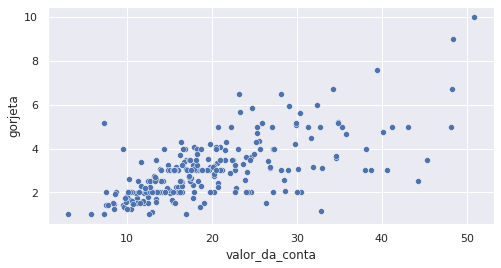

In [25]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

# Outras configurações + salvar gráfico
# valor_gorjeta.figure.suptitle('Valor da conta x Gorjeta')
# valor_gorjeta.set_title('Análise do valor da gorjeta em função do valor da conta')
# valor_gorjeta.set(xlabel='Valor da conta', ylabel='Valor da gorjeta')
# valor_gorjeta.get_figure().savefig('imagem.png')

#### Visualizamente, o valor da gorjeta aumenta conforme aumenta o valor da conta

In [26]:
print(f'A base de dados contém {gorjetas.shape[0]} registros \n')
print('Registros não nulos:')
gorjetas.count()

A base de dados contém 244 registros 

Registros não nulos:


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [27]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [28]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [29]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [30]:
gorjetas['porcentagem'] = gorjetas['porcentagem'].round(2)

In [31]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


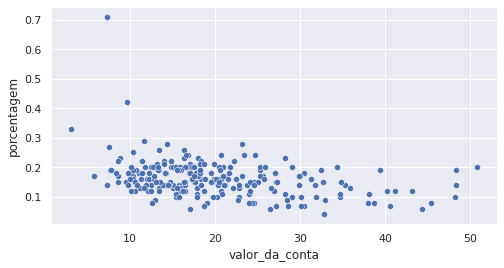

In [32]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

#### Visualmente, o valor da conta não é proporcional ao valor da gorjeta

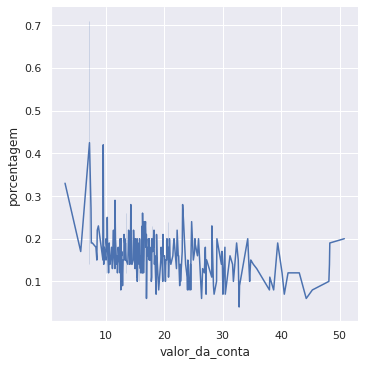

In [33]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

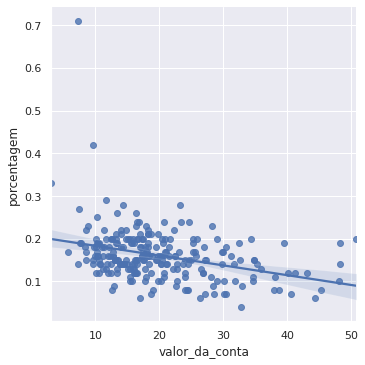

In [34]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

# Análise 2 - Sobremesa

In [35]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [36]:
gorjetas[gorjetas['sobremesa'] == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [37]:
gorjetas[gorjetas['sobremesa'] == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


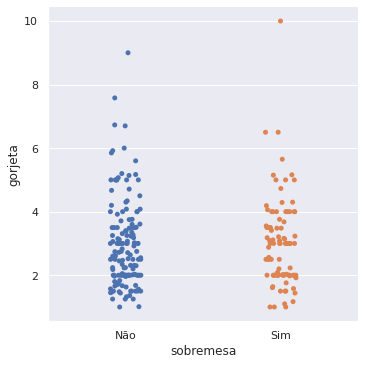

In [38]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

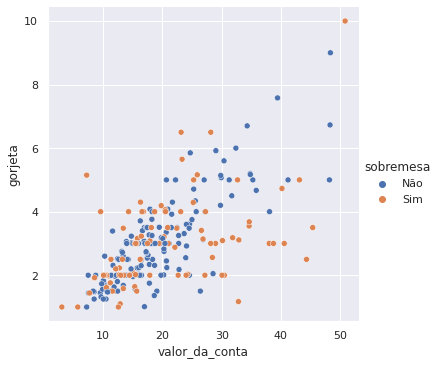

In [39]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

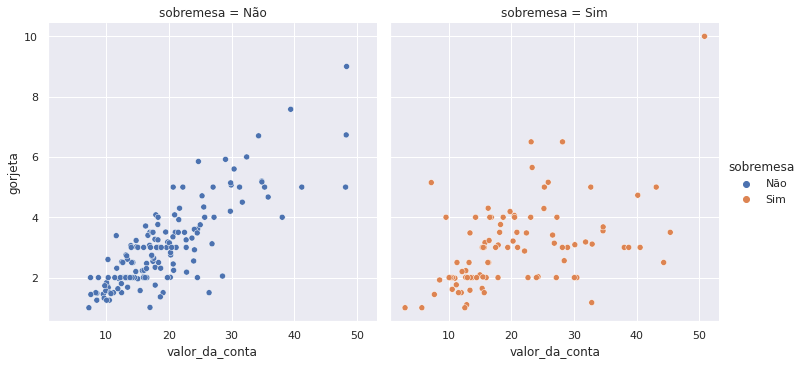

In [40]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

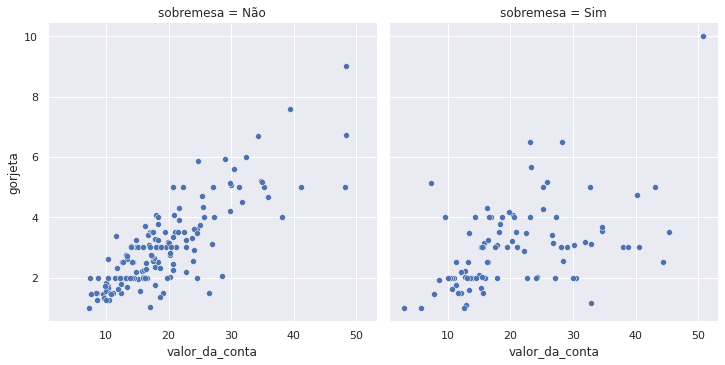

In [41]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', data=gorjetas)

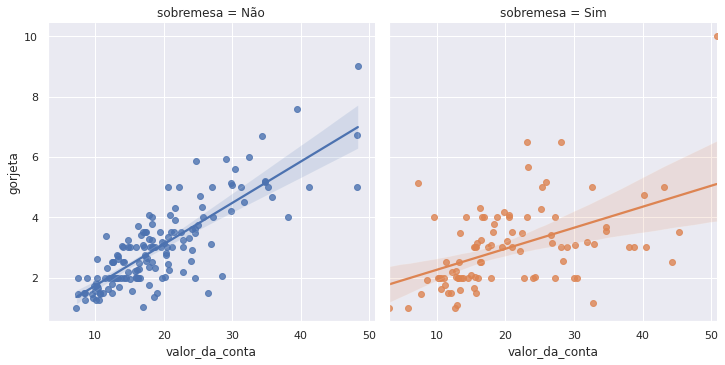

In [42]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

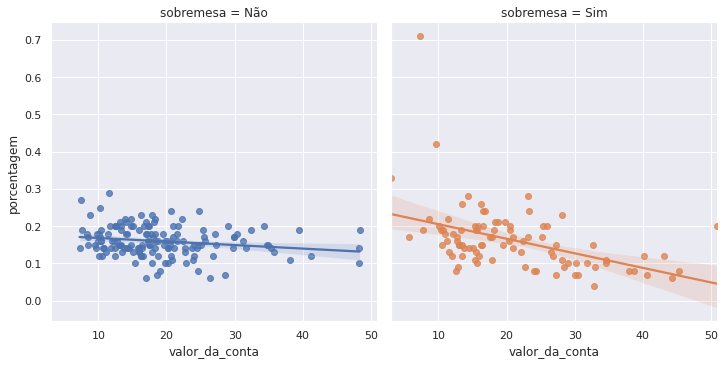

In [43]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

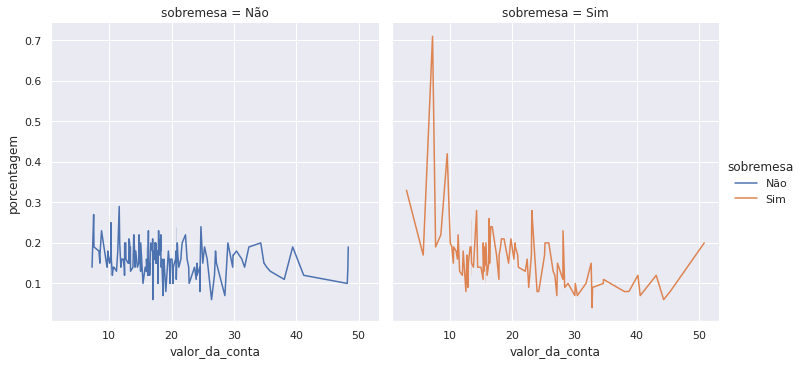

In [44]:
sns.relplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

#### Visualizamente, existe uma diferença no valor da gorjeta daqueles que pediram e não pediram sobremesa

## Teste de hipótese

<b>H<sup>null</sup></b>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>A distribuição da taxa da gorjeta é a mesma nos dois grupos</b>

<b>H<sup>alt</sup></b>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>A distribuição da taxa da gorjeta não é a mesma nos dois grupos</b>

In [45]:
from scipy.stats import ranksums

In [46]:
sobremesa = gorjetas.query('sobremesa == "Sim"').porcentagem
sem_sobremesa = gorjetas.query('sobremesa == "Não"').porcentagem

In [47]:
r = ranksums(sobremesa, sem_sobremesa)
print(f'O valor do p-value é {r.pvalue}')
#  O p-value representa a probabilidade daquela amostra ter acontecido dentro da população. 
# Se a chance é pequena, geralmente p-value < 0,05, representa que um evento muito raro aconteceu, 
# então optamos por descartar a hipótese nula, e dizer que ela pode não ser verdade.

O valor do p-value é 0.5266635660124415


<b>H<sup>null</sup></b>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>A distribuição da taxa da gorjeta é a mesma nos dois grupos</b>

# Análise 3 - Dia da semana

In [48]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [49]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

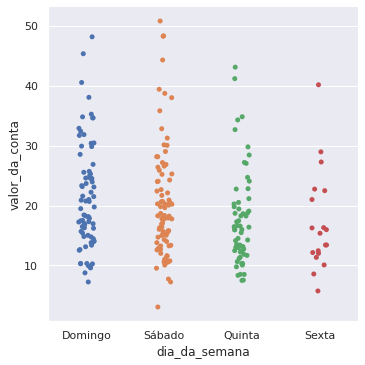

In [50]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

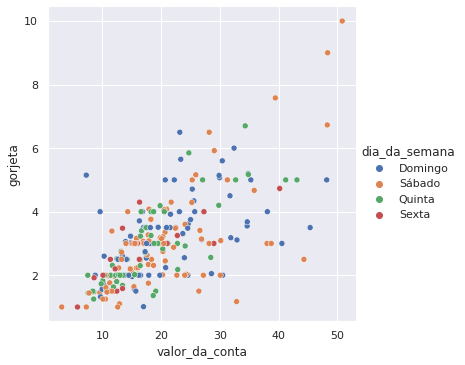

In [51]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

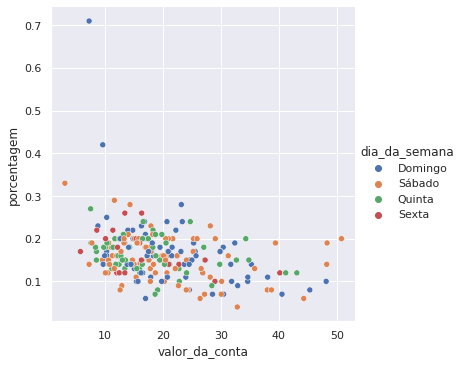

In [52]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

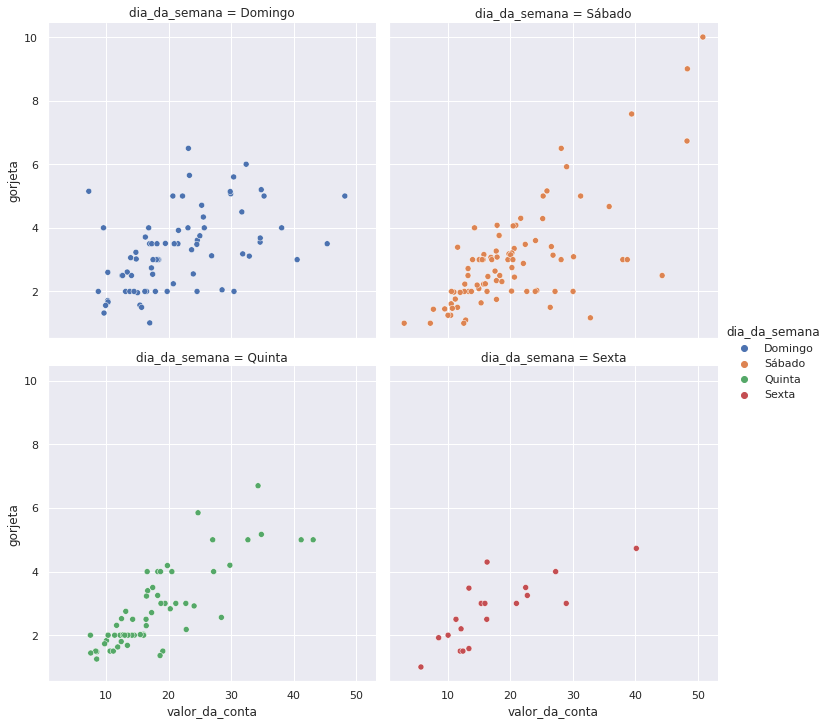

In [53]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', col_wrap=2, data=gorjetas)

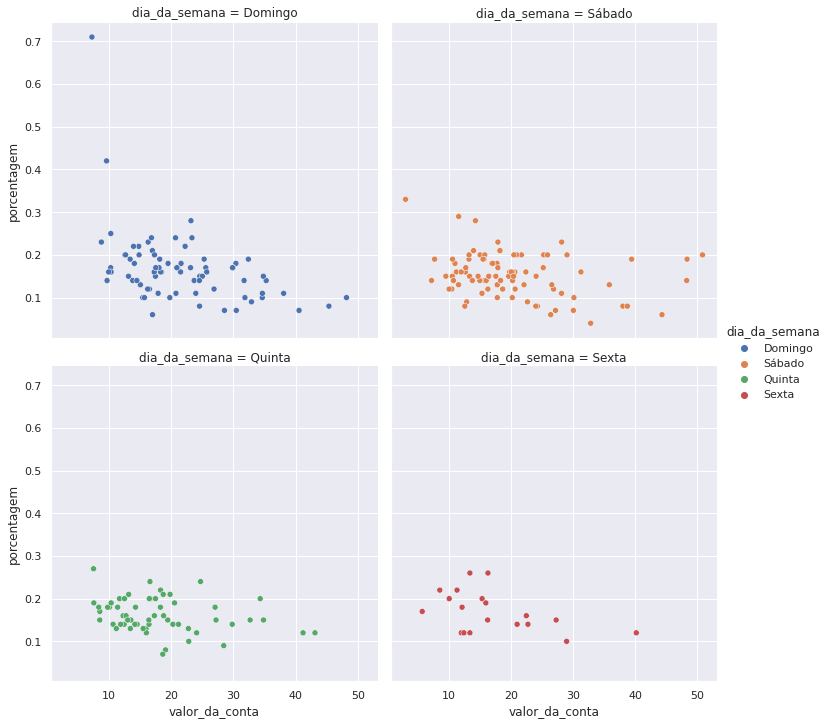

In [54]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', col_wrap=2, data=gorjetas)

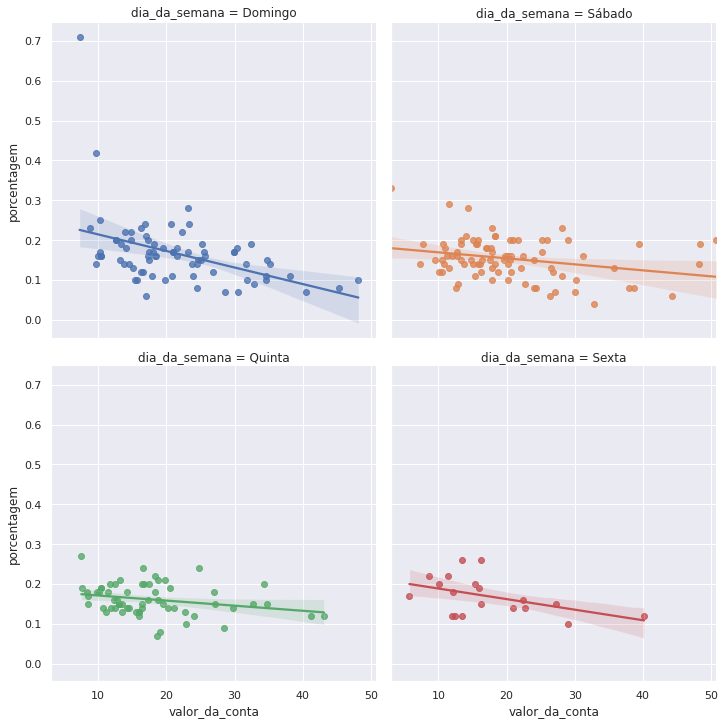

In [55]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', col_wrap=2, data=gorjetas)

In [56]:
media_geral_gorjetas = gorjetas.gorjeta.mean()
print(f'A média geral das gorjetas é de {media_geral_gorjetas}')

A média geral das gorjetas é de 2.9982786885245902


In [57]:
gorjetas.groupby('dia_da_semana').mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [58]:
print('Frequência dos dias:')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias:


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de hipótese

<b>H<sup>null</sup></b>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>A distribuição do valor da conta é igual no sábado e no domingo</b>

<b>H<sup>alt</sup></b>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>A distribuição do valor da conta não é igual no sábado e no domingo</b>

In [59]:
valor_conta_domingo = gorjetas.query('dia_da_semana == "Domingo"').valor_da_conta
valor_conta_sabado = gorjetas.query('dia_da_semana == "Sábado"').valor_da_conta

In [60]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print(f'O valor do p-value é {r2.pvalue}')

O valor do p-value é 0.3576728477868443


<b>H<sup>null</sup></b>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>A distribuição do valor da conta é igual no sábado e no domingo</b>

# Análise 4 - Hora do dia

In [61]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [62]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

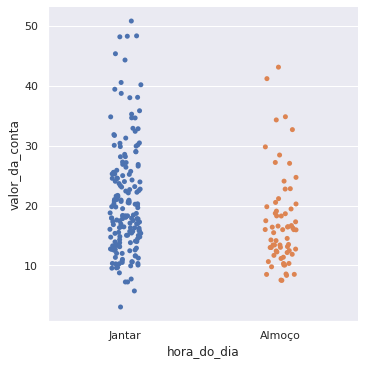

In [63]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

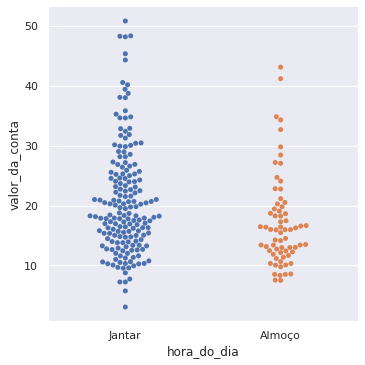

In [64]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

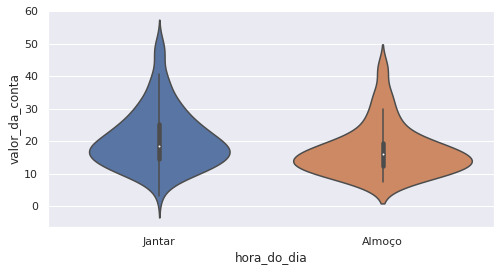

In [65]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

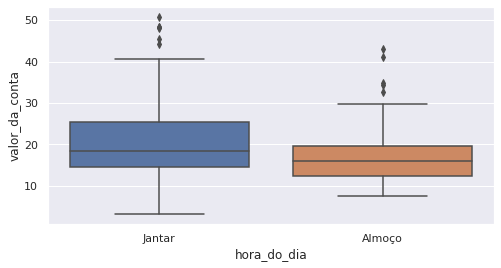

In [66]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [67]:
almoco = gorjetas.query('hora_do_dia == "Almoço"').valor_da_conta

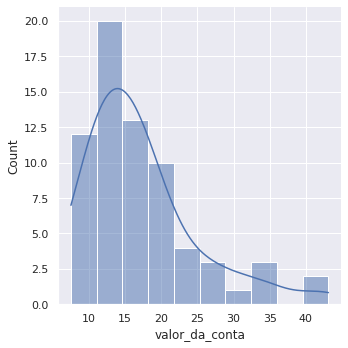

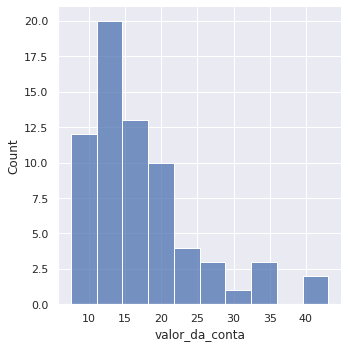

In [68]:
sns.displot(almoco, kde=True)
sns.displot(almoco)

In [69]:
jantar = gorjetas.query('hora_do_dia == "Jantar"').valor_da_conta

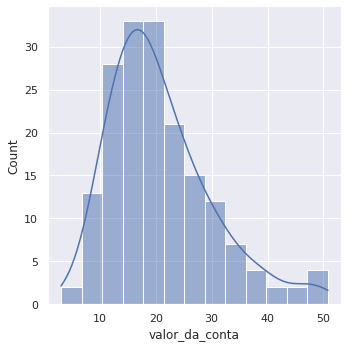

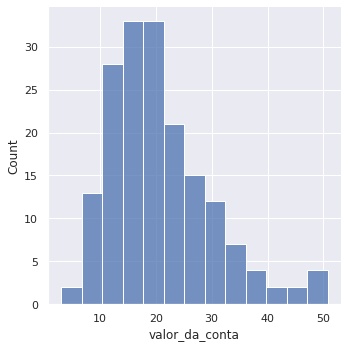

In [70]:
sns.displot(jantar, kde=True)
sns.displot(jantar)

In [71]:
gorjetas.groupby('hora_do_dia').mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de hipótese

<b>H<sup>null</sup></b>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>A distribuição do valor da conta é igual no jantar e no almoço</b>

<b>H<sup>alt</sup></b>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>A distribuição do valor da conta não é igual no jantar e no almoço</b>

In [72]:
r3 = ranksums(jantar, almoco)
print(f'O valor do p-value é {r3.pvalue}')

O valor do p-value é 0.0011791039723641672


<b>H<sup>alt</sup></b>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>A distribuição do valor da conta não é igual no jantar e no almoço</b>

## Teste de hipótese 2

<b>H<sup>null</sup></b>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>A distribuição da taxa da gorjeta é igual no jantar e no almoço</b>

<b>H<sup>alt</sup></b>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>A distribuição da taxa da gorjeta não é igual no jantar e no almoço</b>

In [73]:
porcentagem_almoco = gorjetas.query('hora_do_dia == "Almoço"').porcentagem
porcentagem_jantar = gorjetas.query('hora_do_dia == "Jantar"').porcentagem

In [74]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)
print(f'O valor do p-value é {r4.pvalue}')

O valor do p-value é 0.2602493995587126


<b>H<sup>null</sup></b>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>A distribuição da taxa da gorjeta é igual no jantar e no almoço</b>